In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from feature_selection import filter_method as ft


In [4]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# plt.style.use('seaborn-colorblind')
# %matplotlib inline
from sklearn.feature_selection import RFE
from feature_selection import hybrid


## Recursive Feature Addition

In [11]:
df = pd.read_csv("parsed_training.csv")

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
columns = df.columns.tolist()
#Columns with missing value
columns_with_missing = []
for column in columns:
    if df[column].isnull().sum()>0:
        columns_with_missing.append({"column":column, "missing":df[column].isnull().sum()})
        
df_missing_distribution = pd.DataFrame.from_dict(columns_with_missing)
df_missing_distribution.sort_values("missing",ascending=False).reset_index(inplace=True)
# df_missing_distribution.to_csv("missing_value.csv")


from sklearn.impute import SimpleImputer
imputer_frequent = SimpleImputer(strategy="most_frequent")
for column in df_missing_distribution["column"]:
    try:
        if df[column].nunique()>=30:
            df[column].fillna(df[column].mean(),inplace=True)
        else:
            df[column].fillna(df[column].value_counts().index[0],inplace=True)
    except:
        print(column)
        


In [13]:
df = pd.get_dummies(df.drop(labels=['Unnamed: 0',"person_id_syn","cnty_cd","zip_cd"], axis=1))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["transportation_issues"], axis=1), 
                                                    df.transportation_issues, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((55657, 919), (13915, 919))

In [15]:
# Add in

features_to_keep = hybrid.recursive_feature_addition_rf(X_train=X_train,
                                                        y_train=y_train,
                                                        X_test=X_test,
                                                        y_test=y_test,
                                                        tol=0.001)


testing feature:  est_age  which is feature  1  out of  919
New Test ROC AUC=0.5507067121144991
All features Test ROC AUC=0.5073965274055032
Increase in ROC AUC=0.043310184708995836
keep:  est_age

testing feature:  smoker_current_ind  which is feature  2  out of  919
New Test ROC AUC=0.5618973979487005
All features Test ROC AUC=0.5507067121144991
Increase in ROC AUC=0.011190685834201464
keep:  smoker_current_ind

testing feature:  smoker_former_ind  which is feature  3  out of  919
New Test ROC AUC=0.5641655546876188
All features Test ROC AUC=0.5618973979487005
Increase in ROC AUC=0.0022681567389182256
keep:  smoker_former_ind

testing feature:  cci_score  which is feature  4  out of  919
New Test ROC AUC=0.580794421791087
All features Test ROC AUC=0.5641655546876188
Increase in ROC AUC=0.016628867103468226
keep:  cci_score

testing feature:  dcsi_score  which is feature  5  out of  919
New Test ROC AUC=0.602584651005806
All features Test ROC AUC=0.580794421791087
Increase in ROC AUC

New Test ROC AUC=0.6766521721136226
All features Test ROC AUC=0.6789535438991114
Increase in ROC AUC=-0.002301371785488837
remove:  ccsp_107_ind

testing feature:  ccsp_120_ind  which is feature  40  out of  919
New Test ROC AUC=0.6718049706784724
All features Test ROC AUC=0.6789535438991114
Increase in ROC AUC=-0.0071485732206389985
remove:  ccsp_120_ind

testing feature:  ccsp_125_ind  which is feature  41  out of  919
New Test ROC AUC=0.6718128374000286
All features Test ROC AUC=0.6789535438991114
Increase in ROC AUC=-0.007140706499082827
remove:  ccsp_125_ind

testing feature:  ccsp_130_ind  which is feature  42  out of  919
New Test ROC AUC=0.677063721582942
All features Test ROC AUC=0.6789535438991114
Increase in ROC AUC=-0.0018898223161694094
remove:  ccsp_130_ind

testing feature:  ccsp_163_ind  which is feature  43  out of  919
New Test ROC AUC=0.6761884827456167
All features Test ROC AUC=0.6789535438991114
Increase in ROC AUC=-0.00276506115349473
remove:  ccsp_163_ind

testin

New Test ROC AUC=0.7051847305430363
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.0006528972342720873
remove:  cons_n2029_y

testing feature:  cons_n2mob  which is feature  77  out of  919
New Test ROC AUC=0.6987376981346641
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.007099929642644276
remove:  cons_n2mob

testing feature:  cons_n2pbl  which is feature  78  out of  919
New Test ROC AUC=0.6984868777799306
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.007350749997377837
remove:  cons_n2pbl

testing feature:  cons_n2pmv  which is feature  79  out of  919
New Test ROC AUC=0.7010001022063979
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.00483752557091055
remove:  cons_n2pmv

testing feature:  cons_n65p_y  which is feature  80  out of  919
New Test ROC AUC=0.7033220860220109
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.0025155417552975567
remove:  cons_n65p_y

testing feature:  c

New Test ROC AUC=0.7013725010149493
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.004465126762359106
remove:  credit_bal_nonagnfirstmtg_60dpd

testing feature:  credit_bal_nonmtgcredit_60dpd  which is feature  112  out of  919
New Test ROC AUC=0.7040940207793657
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.001743606997942737
remove:  credit_bal_nonmtgcredit_60dpd

testing feature:  credit_bal_studentloan_60dpd  which is feature  113  out of  919
New Test ROC AUC=0.7033029172405443
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.0025347105367641287
remove:  credit_bal_studentloan_60dpd

testing feature:  credit_bal_totalallcredit_60dpd  which is feature  114  out of  919
New Test ROC AUC=0.7037907962691493
All features Test ROC AUC=0.7058376277773084
Increase in ROC AUC=-0.002046831508159097
remove:  credit_bal_totalallcredit_60dpd

testing feature:  credit_bal_totalallcredit_60to89dpd  which is feature  115  out of  919
N

New Test ROC AUC=0.70433575476579
All features Test ROC AUC=0.7071817801362312
Increase in ROC AUC=-0.0028460253704412075
remove:  credit_num_1stmtg_30to59dpd

testing feature:  credit_num_1stmtg_60to89dpd  which is feature  146  out of  919
New Test ROC AUC=0.6971977721444553
All features Test ROC AUC=0.7071817801362312
Increase in ROC AUC=-0.0099840079917759
remove:  credit_num_1stmtg_60to89dpd

testing feature:  credit_num_1stmtg_bankruptcy  which is feature  147  out of  919
New Test ROC AUC=0.7072339403623635
All features Test ROC AUC=0.7071817801362312
Increase in ROC AUC=5.216022613230287e-05
remove:  credit_num_1stmtg_bankruptcy

testing feature:  credit_num_1stmtg_collections  which is feature  148  out of  919
New Test ROC AUC=0.7087960029411375
All features Test ROC AUC=0.7071817801362312
Increase in ROC AUC=0.0016142228049063068
keep:  credit_num_1stmtg_collections

testing feature:  credit_num_1stmtg_severederog  which is feature  149  out of  919
New Test ROC AUC=0.706036

New Test ROC AUC=0.6992564545535633
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.009539548387574204
remove:  credit_num_totalallcredit_severederog

testing feature:  credit_prcnt_agencyfirstmtg  which is feature  180  out of  919
New Test ROC AUC=0.7035310928205656
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.005264910120571953
remove:  credit_prcnt_agencyfirstmtg

testing feature:  credit_prcnt_autobank  which is feature  181  out of  919
New Test ROC AUC=0.7037657528558231
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.005030250085314436
remove:  credit_prcnt_autobank

testing feature:  credit_prcnt_mtgcredit  which is feature  182  out of  919
New Test ROC AUC=0.7044605246286114
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.00433547831252612
remove:  credit_prcnt_mtgcredit

testing feature:  credit_prcnt_nonagnfirstmtg  which is feature  183  out of  919
New Test ROC AUC=0.7024637596196588
All f

New Test ROC AUC=0.7049605188149619
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0038354841261756256
remove:  pdc_dep

testing feature:  pdc_dia  which is feature  215  out of  919
New Test ROC AUC=0.7023462263275713
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0064497766135662715
remove:  pdc_dia

testing feature:  pdc_hf  which is feature  216  out of  919
New Test ROC AUC=0.7068760756776175
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0019199272635200826
remove:  pdc_hf

testing feature:  pdc_ht  which is feature  217  out of  919
New Test ROC AUC=0.7046973393731325
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.004098663568005034
remove:  pdc_ht

testing feature:  pdc_lip  which is feature  218  out of  919
New Test ROC AUC=0.7039105249253923
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.004885478015745237
remove:  pdc_lip

testing feature:  pdc_ost  which is feature  219

New Test ROC AUC=0.7031249097969589
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.005671093144178685
remove:  rx_gpi2_07_pmpm_ct

testing feature:  rx_gpi2_08_pmpm_ct  which is feature  252  out of  919
New Test ROC AUC=0.703247687570084
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.005548315371053492
remove:  rx_gpi2_08_pmpm_ct

testing feature:  rx_gpi2_09_pmpm_ct  which is feature  253  out of  919
New Test ROC AUC=0.7022734134164232
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.006522589524714295
remove:  rx_gpi2_09_pmpm_ct

testing feature:  rx_gpi2_11_pmpm_ct  which is feature  254  out of  919
New Test ROC AUC=0.7095770647216932
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=0.000781061780555703
remove:  rx_gpi2_11_pmpm_ct

testing feature:  rx_gpi2_12_pmpm_ct  which is feature  255  out of  919
New Test ROC AUC=0.7015566270197453
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-

New Test ROC AUC=0.703247687570084
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.005548315371053492
remove:  rx_gpi2_45_pmpm_ct

testing feature:  rx_gpi2_46_pmpm_ct  which is feature  289  out of  919
New Test ROC AUC=0.6995030061446617
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.009292996796475883
remove:  rx_gpi2_46_pmpm_ct

testing feature:  rx_gpi2_47_pmpm_ct  which is feature  290  out of  919
New Test ROC AUC=0.7042091960877309
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.004586806853406622
remove:  rx_gpi2_47_pmpm_ct

testing feature:  rx_gpi2_48_pmpm_ct  which is feature  291  out of  919
New Test ROC AUC=0.7019792549470701
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.006816747994067396
remove:  rx_gpi2_48_pmpm_ct

testing feature:  rx_gpi2_49_pmpm_ct  which is feature  292  out of  919
New Test ROC AUC=0.7018696087039846
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=

New Test ROC AUC=0.703247687570084
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.005548315371053492
remove:  rx_gpi2_84_pmpm_ct

testing feature:  rx_gpi2_85_pmpm_ct  which is feature  326  out of  919
New Test ROC AUC=0.7034198203818096
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0053761825593279244
remove:  rx_gpi2_85_pmpm_ct

testing feature:  rx_gpi2_86_pmpm_ct  which is feature  327  out of  919
New Test ROC AUC=0.7021709427617339
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0066250601794036745
remove:  rx_gpi2_86_pmpm_ct

testing feature:  rx_gpi2_87_pmpm_ct  which is feature  328  out of  919
New Test ROC AUC=0.7039415649352535
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.004854438005884032
remove:  rx_gpi2_87_pmpm_ct

testing feature:  rx_gpi2_88_pmpm_ct  which is feature  329  out of  919
New Test ROC AUC=0.7040414743317616
All features Test ROC AUC=0.7087960029411375
Increase in ROC AU

New Test ROC AUC=0.703247687570084
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.005548315371053492
remove:  submcc_cad_fh/ho_pmpm_ct

testing feature:  submcc_cad_isch_pmpm_ct  which is feature  362  out of  919
New Test ROC AUC=0.7056556564817761
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.003140346459361454
remove:  submcc_cad_isch_pmpm_ct

testing feature:  submcc_cad_mi_pmpm_ct  which is feature  363  out of  919
New Test ROC AUC=0.7051683262942099
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0036276766469276467
remove:  submcc_cad_mi_pmpm_ct

testing feature:  submcc_cad_ptca_pmpm_ct  which is feature  364  out of  919
New Test ROC AUC=0.7026757138978668
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.006120289043270777
remove:  submcc_cad_ptca_pmpm_ct

testing feature:  submcc_can_brst_pmpm_ct  which is feature  365  out of  919
New Test ROC AUC=0.706370755700446
All features Test ROC AUC=0.

New Test ROC AUC=0.7051330378481593
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0036629650929782542
remove:  submcc_end_meta_pmpm_ct

testing feature:  submcc_end_nutr_pmpm_ct  which is feature  398  out of  919
New Test ROC AUC=0.7061106863578362
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0026853165833012893
remove:  submcc_end_nutr_pmpm_ct

testing feature:  submcc_end_othr_pmpm_ct  which is feature  399  out of  919
New Test ROC AUC=0.7057061701847919
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0030898327563456673
remove:  submcc_end_othr_pmpm_ct

testing feature:  submcc_end_thy_pmpm_ct  which is feature  400  out of  919
New Test ROC AUC=0.695205580810826
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.013590422130311586
remove:  submcc_end_thy_pmpm_ct

testing feature:  submcc_gus_brst_pmpm_ct  which is feature  401  out of  919
New Test ROC AUC=0.7059839650602103
All features Test ROC AU

New Test ROC AUC=0.706115544617402
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.002680458323735535
remove:  submcc_mus_back_pmpm_ct

testing feature:  submcc_mus_form_pmpm_ct  which is feature  433  out of  919
New Test ROC AUC=0.7085785805799876
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.00021742236114996594
remove:  submcc_mus_form_pmpm_ct

testing feature:  submcc_mus_inf_pmpm_ct  which is feature  434  out of  919
New Test ROC AUC=0.7034115674387815
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.005384435502356011
remove:  submcc_mus_inf_pmpm_ct

testing feature:  submcc_mus_jnt_pmpm_ct  which is feature  435  out of  919
New Test ROC AUC=0.7074888465337191
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0013071564074184083
remove:  submcc_mus_jnt_pmpm_ct

testing feature:  submcc_mus_oste_pmpm_ct  which is feature  436  out of  919
New Test ROC AUC=0.7083343463177199
All features Test ROC AUC=

New Test ROC AUC=0.7066593037947357
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0021366991464017993
remove:  submcc_res_copd_pmpm_ct

testing feature:  submcc_res_fail_pmpm_ct  which is feature  469  out of  919
New Test ROC AUC=0.7055410503418955
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0032549525992420225
remove:  submcc_res_fail_pmpm_ct

testing feature:  submcc_res_inf_pmpm_ct  which is feature  470  out of  919
New Test ROC AUC=0.706217242829148
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.002578760111989542
remove:  submcc_res_inf_pmpm_ct

testing feature:  submcc_res_othr_pmpm_ct  which is feature  471  out of  919
New Test ROC AUC=0.7079108646376676
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0008851383034699234
remove:  submcc_res_othr_pmpm_ct

testing feature:  submcc_rsk_an_pmpm_ct  which is feature  472  out of  919
New Test ROC AUC=0.703247687570084
All features Test ROC AUC=0

New Test ROC AUC=0.7052064809101296
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.00358952203100793
remove:  submcc_vco_exam_pmpm_ct

testing feature:  submcc_vco_othr_pmpm_ct  which is feature  505  out of  919
New Test ROC AUC=0.6993473588915461
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.009448644049591448
remove:  submcc_vco_othr_pmpm_ct

testing feature:  submcc_vco_vac_pmpm_ct  which is feature  506  out of  919
New Test ROC AUC=0.7063148552242715
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.002481147716866028
remove:  submcc_vco_vac_pmpm_ct

testing feature:  total_ambulance_visit_ct_pmpm  which is feature  507  out of  919
New Test ROC AUC=0.7052205881575715
All features Test ROC AUC=0.7087960029411375
Increase in ROC AUC=-0.0035754147835660444
remove:  total_ambulance_visit_ct_pmpm

testing feature:  total_er_visit_ct_pmpm  which is feature  508  out of  919
New Test ROC AUC=0.7049246002180891
All features Te

New Test ROC AUC=0.7057229606550901
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0063178311623487415
remove:  rx_gpi2_84_ind

testing feature:  rx_gpi2_17_ind  which is feature  541  out of  919
New Test ROC AUC=0.7080070541115797
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.004033737705859131
remove:  rx_gpi2_17_ind

testing feature:  betos_o1e_ind  which is feature  542  out of  919
New Test ROC AUC=0.7052173560936764
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.006823435723762428
remove:  betos_o1e_ind

testing feature:  submcc_pre_del_ind  which is feature  543  out of  919
New Test ROC AUC=0.7057229606550901
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0063178311623487415
remove:  submcc_pre_del_ind

testing feature:  submcc_can_gu_ind  which is feature  544  out of  919
New Test ROC AUC=0.7070303813193048
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.00501041049813399

New Test ROC AUC=0.703229636798141
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.008811155019297856
remove:  submcc_cir_anur_ind

testing feature:  submcc_pre_othr_ind  which is feature  579  out of  919
New Test ROC AUC=0.7057229606550901
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0063178311623487415
remove:  submcc_pre_othr_ind

testing feature:  rx_gpi2_12_ind  which is feature  580  out of  919
New Test ROC AUC=0.7083723179866267
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0036684738308121467
remove:  rx_gpi2_12_ind

testing feature:  rx_gpi2_34_ind  which is feature  581  out of  919
New Test ROC AUC=0.7045827942155894
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.007457997601849398
remove:  rx_gpi2_34_ind

testing feature:  submcc_ano_hrt_ind  which is feature  582  out of  919
New Test ROC AUC=0.7068036286604954
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.00523716

New Test ROC AUC=0.7030293708013152
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.009011421016123622
remove:  rx_gpi2_30_ind

testing feature:  rx_gpi2_26_ind  which is feature  616  out of  919
New Test ROC AUC=0.7040372055681264
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.008003586249312411
remove:  rx_gpi2_26_ind

testing feature:  submcc_trm_hip_ind  which is feature  617  out of  919
New Test ROC AUC=0.700424449266476
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.011616342550962888
remove:  submcc_trm_hip_ind

testing feature:  betos_m5d_ind  which is feature  618  out of  919
New Test ROC AUC=0.7041103030635169
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.007930488753921994
remove:  betos_m5d_ind

testing feature:  submcc_dia_nep_ind  which is feature  619  out of  919
New Test ROC AUC=0.7058473646238858
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.006193427193553092


New Test ROC AUC=0.7088964205237928
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0031443712936460866
remove:  rx_gpi2_36_ind

testing feature:  submcc_sor_ear_ind  which is feature  653  out of  919
New Test ROC AUC=0.7087890306272001
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0032517611902387333
remove:  submcc_sor_ear_ind

testing feature:  submcc_res_asth_ind  which is feature  654  out of  919
New Test ROC AUC=0.702110488937682
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.009930302879756825
remove:  submcc_res_asth_ind

testing feature:  submcc_end_thy_ind  which is feature  655  out of  919
New Test ROC AUC=0.7029457436889582
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.00909504812848061
remove:  submcc_end_thy_ind

testing feature:  rx_gpi2_23_ind  which is feature  656  out of  919
New Test ROC AUC=0.7031485302890734
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.00

New Test ROC AUC=0.6998528618157304
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.01218793000170848
remove:  submcc_rar_lup_ind

testing feature:  rx_gpi2_58_ind  which is feature  691  out of  919
New Test ROC AUC=0.7045985886410395
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.00744220317639932
remove:  rx_gpi2_58_ind

testing feature:  submcc_trm_fxu_ind  which is feature  692  out of  919
New Test ROC AUC=0.7057229606550901
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0063178311623487415
remove:  submcc_trm_fxu_ind

testing feature:  rx_gpi2_72_ind  which is feature  693  out of  919
New Test ROC AUC=0.7091348208090926
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.00290597100834622
remove:  rx_gpi2_72_ind

testing feature:  submcc_end_meta_ind  which is feature  694  out of  919
New Test ROC AUC=0.7052260765679597
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0068147152494

New Test ROC AUC=0.7082638304079564
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.003776961409482471
remove:  submcc_vco_exam_ind

testing feature:  rx_gpi2_39_ind  which is feature  728  out of  919
New Test ROC AUC=0.7054165447358703
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.006624247081568502
remove:  rx_gpi2_39_ind

testing feature:  betos_t1e_ind  which is feature  729  out of  919
New Test ROC AUC=0.7025959286727812
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.009444863144657645
remove:  betos_t1e_ind

testing feature:  submcc_men_schz_ind  which is feature  730  out of  919
New Test ROC AUC=0.7031439362863041
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.008896855531134729
remove:  submcc_men_schz_ind

testing feature:  submcc_sns_othr_ind  which is feature  731  out of  919
New Test ROC AUC=0.7068909350405569
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0051498567

New Test ROC AUC=0.7055484901870882
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.006492301630350639
remove:  submcc_inf_othr_ind

testing feature:  submcc_dig_liv_ind  which is feature  765  out of  919
New Test ROC AUC=0.7022024096479587
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.009838382169480187
remove:  submcc_dig_liv_ind

testing feature:  submcc_gus_kub_ind  which is feature  766  out of  919
New Test ROC AUC=0.7065936867994298
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.005447105018009046
remove:  submcc_gus_kub_ind

testing feature:  submcc_brn_acc_ind  which is feature  767  out of  919
New Test ROC AUC=0.7057229606550901
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0063178311623487415
remove:  submcc_brn_acc_ind

testing feature:  submcc_dia_othr_ind  which is feature  768  out of  919
New Test ROC AUC=0.7061172114679645
All features Test ROC AUC=0.7120407918174388
Increase in ROC 

New Test ROC AUC=0.704256071177934
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.007784720639504861
remove:  submcc_rsk_coag_ind

testing feature:  submcc_rsk_othr_ind  which is feature  802  out of  919
New Test ROC AUC=0.7057229606550901
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0063178311623487415
remove:  submcc_rsk_othr_ind

testing feature:  submcc_rsk_chol_ind  which is feature  803  out of  919
New Test ROC AUC=0.703747254880071
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.008293536937367896
remove:  submcc_rsk_chol_ind

testing feature:  src_platform_cd_EM  which is feature  804  out of  919
New Test ROC AUC=0.7025916192542544
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.00944917256318445
remove:  src_platform_cd_EM

testing feature:  src_platform_cd_LV  which is feature  805  out of  919
New Test ROC AUC=0.7061758968042245
All features Test ROC AUC=0.7120407918174388
Increase in ROC 

New Test ROC AUC=0.7037742090733099
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.008266582744128947
remove:  cons_cmys_4

testing feature:  cons_cmys_5  which is feature  840  out of  919
New Test ROC AUC=0.703626001665387
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.008414790152051821
remove:  cons_cmys_5

testing feature:  cons_cmys_6  which is feature  841  out of  919
New Test ROC AUC=0.7018733082991351
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.010167483518303766
remove:  cons_cmys_6

testing feature:  cons_cmys_n  which is feature  842  out of  919
New Test ROC AUC=0.7099062067254086
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.002134585092030239
remove:  cons_cmys_n

testing feature:  cons_hhcomp_A  which is feature  843  out of  919
New Test ROC AUC=0.7038793222959638
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.008161469521475007
remove:  cons_hhcomp_A

testing 

New Test ROC AUC=0.7055654432769534
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.006475348540485482
remove:  hedis_dia_ma_nephr_N

testing feature:  hedis_dia_ma_nephr_Y  which is feature  878  out of  919
New Test ROC AUC=0.7055144010603447
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.006526390757094158
remove:  hedis_dia_ma_nephr_Y

testing feature:  rucc_category_1-Metro  which is feature  879  out of  919
New Test ROC AUC=0.7034776722927887
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.008563119524650165
remove:  rucc_category_1-Metro

testing feature:  rucc_category_2-Metro  which is feature  880  out of  919
New Test ROC AUC=0.7102019100806488
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.0018388817367900323
remove:  rucc_category_2-Metro

testing feature:  rucc_category_3-Metro  which is feature  881  out of  919
New Test ROC AUC=0.7047833041417659
All features Test ROC AUC=0.71204079181743

New Test ROC AUC=0.7046838622765129
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.007356929540925927
remove:  state_cd_WA

testing feature:  state_cd_WI  which is feature  916  out of  919
New Test ROC AUC=0.7056524040904351
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.006388387727003786
remove:  state_cd_WI

testing feature:  state_cd_WV  which is feature  917  out of  919
New Test ROC AUC=0.7022539803781604
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.009786811439278398
remove:  state_cd_WV

testing feature:  state_cd_other  which is feature  918  out of  919
New Test ROC AUC=0.7057978063108262
All features Test ROC AUC=0.7120407918174388
Increase in ROC AUC=-0.006242985506612619
remove:  state_cd_other
DONE!!
total features to keep:  27


In [25]:
len(features_to_keep)

27

In [23]:
final = pd.read_excel("final.xlsx").drop("Unnamed: 0",axis = 1)
final.head()

,index,column type,null values,null values(%),min,max,mean,std,25%,50%,75%,indicator,redundant_indicator,Zero_Mean,Target_col,Acronyms,VARIABLE_DESC
0,betos_d1c_ind,int64,0,0.0,0.0,1.000000,0.045492,0.208383,0.0,0.0,0.0,1,1,0,0,BETOS,Binary indicator for each of the BETOS codes
1,betos_d1c_pmpm_ct,float64,0,0.0,0.0,2.258278,0.039526,0.208184,0.0,0.0,0.0,0,0,0,1,BETOS,Per Member Per Month Count of Logical Claims ...
2,betos_d1d_ind,int64,0,0.0,0.0,1.000000,0.015423,0.123228,0.0,0.0,0.0,1,1,0,0,BETOS,Binary indicator for each of the BETOS codes
3,betos_d1d_pmpm_ct,float64,0,0.0,0.0,1.505714,0.007197,0.071824,0.0,0.0,0.0,0,0,0,1,BETOS,Per Member Per Month Count of Logical Claims ...
4,betos_m1b_ind,int64,0,0.0,0.0,1.000000,0.934615,0.247207,1.0,1.0,1.0,1,1,0,0,BETOS,Binary indicator for each of the BETOS codes


In [24]:
final["Recursive_Feature_Addition"] = final["index"].apply(lambda x: 1 if x in features_to_keep else 0)

In [182]:
final["Recursive_Feature_Addition"].sum()

26

## Random Shuffling

In [27]:
from feature_selection import feature_shuffle

In [29]:
X_train = X_train.drop('Unnamed: 0.1', axis = 1)

In [30]:
auc_drop, selected_features = feature_shuffle.feature_shuffle_rf(X_train=X_train,
                                                                 y_train=y_train,
                                                                 random_state=0)

In [31]:
auc_drop

,feature,auc_drop
0,est_age,2.344278e-05
63,cms_tot_partd_payment_amt,1.671024e-05
52,cms_disabled_ind,7.526667e-07
61,cms_rx_risk_score_nbr,1.062283e-07
62,cms_tot_ma_payment_amt,8.550086e-08
...,...,...
327,rx_gpi2_87_pmpm_ct,0.000000e+00
328,rx_gpi2_88_pmpm_ct,0.000000e+00
329,rx_gpi2_89_pmpm_ct,0.000000e+00
330,rx_gpi2_90_pmpm_ct,0.000000e+00


In [48]:
selected_features

0                               est_age
63            cms_tot_partd_payment_amt
52                     cms_disabled_ind
61                cms_rx_risk_score_nbr
62               cms_tot_ma_payment_amt
55                   cms_low_income_ind
59      cms_risk_adj_payment_rate_b_amt
269                  rx_gpi2_27_pmpm_ct
194         med_ambulance_visit_ct_pmpm
79                          cons_n65p_y
506       total_ambulance_visit_ct_pmpm
638                       betos_o1a_ind
53                cms_dual_eligible_ind
84          credit_bal_1stmtg_30to59dpd
195                med_er_visit_ct_pmpm
751                 submcc_men_depr_ind
242                       rx_bh_pmpm_ct
272                  rx_gpi2_30_pmpm_ct
848                       cons_hhcomp_G
379              submcc_cer_seq_pmpm_ct
86        credit_bal_1stmtg_collections
60     cms_risk_adjustment_factor_a_amt
14                    betos_o1a_pmpm_ct
131             credit_hh_mtgcredit_new
68          cmsd2_men_men_substance_ind


In [46]:
final["Random_Shuffling"] = final["index"].apply(lambda x: 1 if x in list(selected_features) else 0)

In [47]:
final["Random_Shuffling"].sum()

44

In [106]:
extra = []
for x in selected_features:
    if x in list(final["index"]):
        continue
    else:
        extra.append(x)
        
for x in extra:
    if x[:-2] in list(final["index"]):
         final.loc[final[final["index"]==x[:-2]].index,"Random_Shuffling"]=1
    elif x[:-3] in list(final["index"]):
        final.loc[final[final["index"]==x[:-3]].index,"Random_Shuffling"]=1
    elif x[:-4] in list(final["index"]):
        final.loc[final[final["index"]==x[:-4]].index,"Random_Shuffling"]=1
#     if (x[:-2] in list(final["index"])) or (x[:-3] in list(final["index"])) or (x[:-4] in list(final["index"])):
#         try:
#             final[final["index"]==x[:-2]]["Random_Shuffling"]=1
#         except:
#             try:
#                 final[final["index"]==x[:-3]]["Random_Shuffling"]=1
#             except:
#                 final[final["index"]==x[:-4]]["Random_Shuffling"]=1


In [66]:
extra

['cons_hhcomp_G', 'state_cd_MN', 'mabh_seg_UNK', 'cons_cmys_4']

## Lasso

In [166]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from feature_selection import embedded_method

In [112]:
# linear models benefit from feature scaling

scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [113]:
# fit the LR model
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train), y_train)

D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [114]:
# make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 918
selected features: 670
features with coefficients shrank to zero: 248


In [115]:
# we can identify the removed features like this:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['betos_t1e_pmpm_ct', 'bh_cdsb_ind', 'ccsp_021_ind', 'ccsp_034_ind',
       'ccsp_080_ind', 'ccsp_120_ind', 'ccsp_169_ind',
       'cmsd2_mus_polyarthropath_ind', 'cons_n2029_y',
       'credit_hh_agencyfirstmtg',
       ...
       'hedis_dia_hba1c_test_Y', 'hedis_dia_ldc_c_control_N',
       'hedis_dia_ldc_c_screen_N', 'rucc_category_6-Nonmetro', 'state_cd_CA',
       'state_cd_IA', 'state_cd_IL', 'state_cd_NM', 'state_cd_OH',
       'state_cd_SD'],
      dtype='object', length=248)

In [117]:
left_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
left_feats

Index(['est_age', 'smoker_current_ind', 'smoker_former_ind', 'cci_score',
       'dcsi_score', 'fci_score', 'hcc_weighted_sum', 'betos_d1c_pmpm_ct',
       'betos_d1d_pmpm_ct', 'betos_m1b_pmpm_ct',
       ...
       'state_cd_OK', 'state_cd_PR', 'state_cd_SC', 'state_cd_TN',
       'state_cd_TX', 'state_cd_VA', 'state_cd_WA', 'state_cd_WI',
       'state_cd_WV', 'state_cd_other'],
      dtype='object', length=670)

In [135]:
final["Lasso"] = final["index"].apply(lambda x: 1 if x in list(left_feats) else 0)

In [121]:
lasso_extra=[]
for i in left_feats:
    if i not in list(final["index"]):
        lasso_extra.append(i)

In [127]:
distinct_lasso_extra = []

for i in lasso_extra:
    index = i.rfind("_") #strat from the right 
    if i[:index] not in distinct_lasso_extra:
        distinct_lasso_extra.append(i[:index])
        
distinct_lasso_extra

['src_platform_cd',
 'sex_cd',
 'lang_spoken_cd',
 'mabh_seg',
 'cms_ra_factor_type_cd',
 'cons_cmys',
 'cons_hhcomp',
 'cons_homstat',
 'hedis_ami',
 'hedis_cmc_ldc_c_control',
 'hedis_cmc_ldc_c_screen',
 'hedis_dia_eye',
 'hedis_dia_hba1c_ge9',
 'hedis_dia_hba1c_test',
 'hedis_dia_ldc_c_control',
 'hedis_dia_ldc_c_screen',
 'hedis_dia_ma_nephr',
 'rucc_category',
 'state_cd']

In [146]:
final["Lasso"] = final["index"].apply(lambda x: 1 if (x in left_feats) or (x in distinct_lasso_extra) else 0)

In [147]:
final["Lasso"].sum()

594

## Random Forest Importance

Feature ranking:
1. feature no:63 feature name:cms_tot_partd_payment_amt (0.044324)
2. feature no:0 feature name:est_age (0.043785)
3. feature no:506 feature name:total_ambulance_visit_ct_pmpm (0.022440)
4. feature no:194 feature name:med_ambulance_visit_ct_pmpm (0.020522)
5. feature no:14 feature name:betos_o1a_pmpm_ct (0.018191)
6. feature no:61 feature name:cms_rx_risk_score_nbr (0.016420)
7. feature no:55 feature name:cms_low_income_ind (0.014826)
8. feature no:53 feature name:cms_dual_eligible_ind (0.014404)
9. feature no:52 feature name:cms_disabled_ind (0.014051)
10. feature no:57 feature name:cms_partd_ra_factor_amt (0.013764)
11. feature no:50 feature name:ccsp_239_ind (0.012985)
12. feature no:638 feature name:betos_o1a_ind (0.012677)
13. feature no:226 feature name:prov_spec_ambulance_ind (0.010642)
14. feature no:62 feature name:cms_tot_ma_payment_amt (0.009799)
15. feature no:58 feature name:cms_risk_adj_payment_rate_a_amt (0.009687)
16. feature no:342 feature name:rx_over

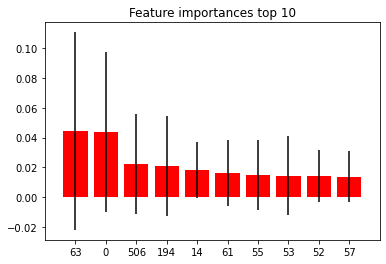

In [149]:
model = embedded_method.rf_importance(X_train=X_train,y_train=y_train,
                             max_depth=10,top_n=10)

In [151]:
# select features whose importance > threshold
from sklearn.feature_selection import SelectFromModel

# 334 features have importance > 2 times median
feature_selection2 = SelectFromModel(model, threshold='2*median',prefit=True) 
selected_feat2 = X_train.columns[(feature_selection2.get_support())]
selected_feat2

Index(['est_age', 'smoker_current_ind', 'cci_score', 'dcsi_score', 'fci_score',
       'hcc_weighted_sum', 'betos_d1c_pmpm_ct', 'betos_d1d_pmpm_ct',
       'betos_m1b_pmpm_ct', 'betos_m5b_pmpm_ct',
       ...
       'cms_ra_factor_type_cd_CF', 'cms_ra_factor_type_cd_CN',
       'cms_ra_factor_type_cd_CP', 'cons_cmys_4', 'cons_cmys_n',
       'cons_homstat_R', 'cons_homstat_Y', 'hedis_dia_eye_Y',
       'hedis_dia_ldc_c_control_Y', 'hedis_dia_ldc_c_screen_Y'],
      dtype='object', length=334)

In [172]:
# 334 features have importance >= 0.0001 times median
feature_selection3 = SelectFromModel(model, threshold=0.00001,prefit=True) 
selected_feat3 = X_train.columns[(feature_selection3.get_support())]
selected_feat3

Index(['est_age', 'smoker_current_ind', 'smoker_former_ind', 'cci_score',
       'dcsi_score', 'fci_score', 'hcc_weighted_sum', 'betos_d1c_pmpm_ct',
       'betos_d1d_pmpm_ct', 'betos_m1b_pmpm_ct',
       ...
       'state_cd_NV', 'state_cd_OH', 'state_cd_PR', 'state_cd_SC',
       'state_cd_TN', 'state_cd_TX', 'state_cd_VA', 'state_cd_WI',
       'state_cd_WV', 'state_cd_other'],
      dtype='object', length=747)

In [173]:
RF_extra=[]
for i in selected_feat3:
    if i not in list(final["index"]):
        RF_extra.append(i)

distinct_RF_extra = []

for i in RF_extra:
    index = i.rfind("_") #strat from the right 
    if i[:index] not in distinct_RF_extra:
        distinct_RF_extra.append(i[:index])

In [178]:
len(distinct_RF_extra)

19

In [175]:
final["Random_Forest"] = final["index"].apply(lambda x: 1 if (x in selected_feat3) or (x in distinct_RF_extra) else 0)

## Gradient Boosted Trees Importance

Feature ranking:
1. feature no:63 feature name:cms_tot_partd_payment_amt (0.091797)
2. feature no:0 feature name:est_age (0.036334)
3. feature no:14 feature name:betos_o1a_pmpm_ct (0.026492)
4. feature no:52 feature name:cms_disabled_ind (0.014738)
5. feature no:194 feature name:med_ambulance_visit_ct_pmpm (0.011268)
6. feature no:50 feature name:ccsp_239_ind (0.009941)
7. feature no:506 feature name:total_ambulance_visit_ct_pmpm (0.007855)
8. feature no:9 feature name:betos_m1b_pmpm_ct (0.006213)
9. feature no:93 feature name:credit_bal_autobank_new (0.005947)
10. feature no:136 feature name:credit_hh_totalallcredit_bankruptcy (0.005933)
11. feature no:92 feature name:credit_bal_autobank (0.005893)
12. feature no:100 feature name:credit_bal_heloc_severederog (0.005752)
13. feature no:108 feature name:credit_bal_nonagn1stmorg_bankruptc (0.005706)
14. feature no:521 feature name:total_physician_office_visit_ct_pmpm (0.005693)
15. feature no:61 feature name:cms_rx_risk_score_nbr (0.00549

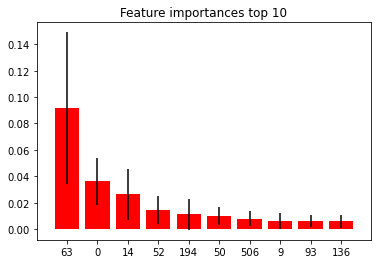

In [167]:
GBTmodel = embedded_method.gbt_importance(X_train=X_train,y_train=y_train,
                             max_depth=10,top_n=10)

In [171]:
# 334 features have importance > 2 times median
feature_selection4 = SelectFromModel(GBTmodel, threshold=0.00001,prefit=True) 
selected_feat4 = X_train.columns[(feature_selection4.get_support())]
selected_feat4

Index(['est_age', 'smoker_current_ind', 'smoker_former_ind', 'cci_score',
       'dcsi_score', 'fci_score', 'hcc_weighted_sum', 'betos_d1c_pmpm_ct',
       'betos_d1d_pmpm_ct', 'betos_m1b_pmpm_ct',
       ...
       'state_cd_OK', 'state_cd_PR', 'state_cd_SC', 'state_cd_TN',
       'state_cd_TX', 'state_cd_VA', 'state_cd_WA', 'state_cd_WI',
       'state_cd_WV', 'state_cd_other'],
      dtype='object', length=696)

In [176]:
GBT_extra=[]
for i in selected_feat4:
    if i not in list(final["index"]):
        GBT_extra.append(i)

distinct_GBT_extra = []

for i in GBT_extra:
    index = i.rfind("_") #strat from the right 
    if i[:index] not in distinct_GBT_extra:
        distinct_GBT_extra.append(i[:index])

In [179]:
final["Gradient_Boosted_Trees"] = final["index"].apply(lambda x: 1 if (x in selected_feat4) or (x in distinct_GBT_extra) else 0)

In [181]:
final.to_excel("9.25final.xlsx")